In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

In [12]:
df_256k_async = []

for i in range(1, 21):
    temp = pd.read_csv(f'cache-size/pause-seconds-20-tests/round1/async/run{i}/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
    # Convert nanoseconds to microseconds for the 'time' column
    temp['latency'] = temp['latency'] / 1000000  # Convert nanoseconds to milliseconds
    # Calculate cumulative GBs of data written
    temp['cumulative_gb'] = temp['write_size'].cumsum() / (1024**3)
    df_256k_async.append(temp)

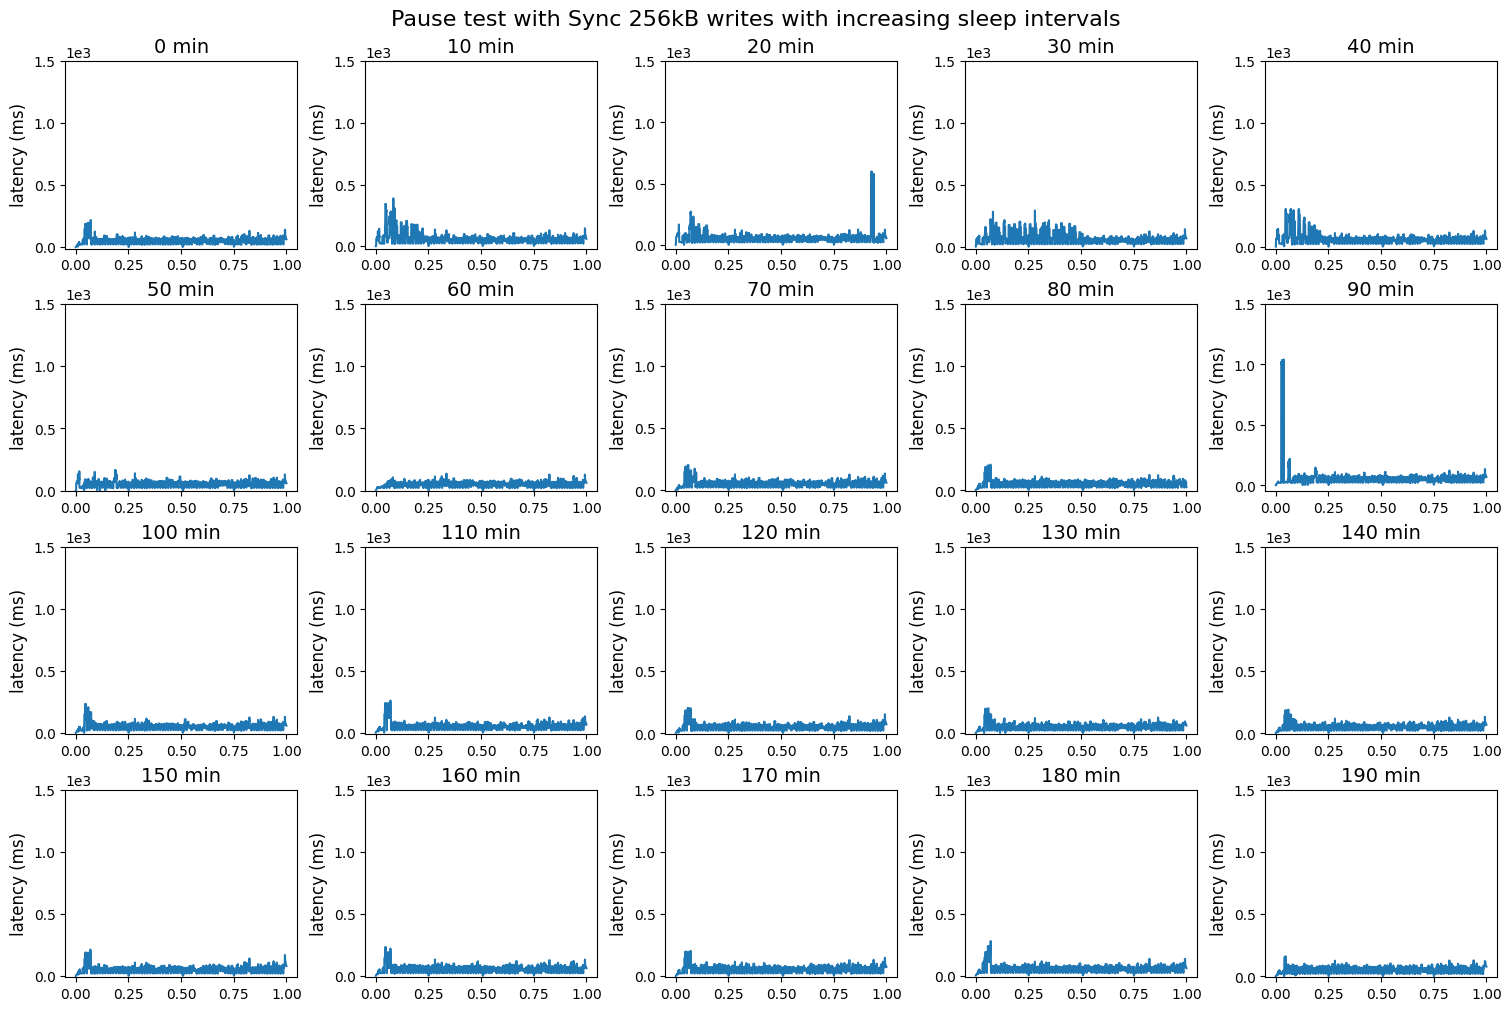

In [13]:
fig, (axs ) = plt.subplots(4, 5, layout='constrained', figsize=(15, 10), sharex=False, sharey=False)

count = 0
for x in range(0, 4):
    for y in range(0, 5):
        axs[x,y].plot(df_256k_async[count]['cumulative_gb'], df_256k_async[count]['latency'], linestyle='-')
        count += 1

count = 0
for (m,n), subplot in np.ndenumerate(axs):
    subplot.yaxis.set_ticks(np.arange(0, 2000, 500))
    subplot.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    subplot.set_ylabel('latency (ms)', fontsize=12)
    subplot.set_title(str( count * 10) + ' min', fontsize=14)
    count += 1
plt.suptitle('Pause test with Sync 256kB writes with increasing sleep intervals', fontsize=16)

# plt.savefig('/Users/Puneet89/scratch/fast24/fig/cache/pause_test_1MB_all.pdf',bbox_inches='tight')
plt.show()